# Sequential model

*Dense model 64*
*Dense model 64*
*Epoch 350*

_MSE: 28_
15/15 - 0s - loss: 28.7832 - mae: 4.6851 - mse: 28.7832
Testing set Mean Abs Error:  4.69 ibova_0

In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
dataset_path = 'final_ibova_oil_usd_ROC.csv'
raw_dataset = pd.read_csv(dataset_path, sep=",")

dataset = raw_dataset.copy()

In [3]:
dataset

,index,ibova_0,ibova_1,ibova_2,ibova_3,ibova_4,oil_0,oil_1,oil_2,oil_3,oil_4,usd_0,usd_1,usd_2,usd_3,usd_4
0,0,1.852453,5.731218,5.678287,6.704554,4.870696,1.852453,5.731218,5.678287,6.704554,4.870696,1.852453,5.731218,5.678287,6.704554,4.870696
1,1,5.731218,5.678287,6.704554,4.870696,5.135128,5.731218,5.678287,6.704554,4.870696,5.135128,5.731218,5.678287,6.704554,4.870696,5.135128
2,2,5.678287,6.704554,4.870696,5.135128,5.976096,5.678287,6.704554,4.870696,5.135128,5.976096,5.678287,6.704554,4.870696,5.135128,5.976096
3,3,6.704554,4.870696,5.135128,5.976096,10.159998,6.704554,4.870696,5.135128,5.976096,10.159998,6.704554,4.870696,5.135128,5.976096,10.159998
4,4,4.870696,5.135128,5.976096,10.159998,8.056570,4.870696,5.135128,5.976096,10.159998,8.056570,4.870696,5.135128,5.976096,10.159998,8.056570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,2388,-1.279721,-3.354260,-6.276465,-6.729609,-7.903147,-1.279721,-3.354260,-6.276465,-6.729609,-7.903147,-1.279721,-3.354260,-6.276465,-6.729609,-7.903147
2389,2389,-3.354260,-6.276465,-6.729609,-7.903147,-6.691182,-3.354260,-6.276465,-6.729609,-7.903147,-6.691182,-3.354260,-6.276465,-6.729609,-7.903147,-6.691182
2390,2390,-6.276465,-6.729609,-7.903147,-6.691182,-7.227916,-6.276465,-6.729609,-7.903147,-6.691182,-7.227916,-6.276465,-6.729609,-7.903147,-6.691182,-7.227916
2391,2391,-6.729609,-7.903147,-6.691182,-7.227916,-6.595764,-6.729609,-7.903147,-6.691182,-7.227916,-6.595764,-6.729609,-7.903147,-6.691182,-7.227916,-6.595764


In [4]:
# 'index','ibova_0','ibova_1','ibova_2','ibova_3','ibova_4','oil_0','oil_1','oil_2','oil_3','oil_4','usd_0','usd_1','usd_2','usd_3','usd_4'

In [5]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [6]:
# Não tirei a variavel predita do treinamento
train_labels = train_dataset['ibova_0']
test_labels = test_dataset['ibova_0']

# Inspecionando os dados

In [7]:
# sns.pairplot(train_dataset[['index','ibova_0','ibova_1','ibova_2','ibova_3','ibova_4','oil_0','oil_1','oil_2','oil_3','oil_4','usd_0','usd_1','usd_2','usd_3','usd_4']], diag_kind="kde")

In [8]:
# sns.pairplot(train_dataset[['index','ibova_0','oil_0','usd_0']], diag_kind="kde")

# Construindo o modelo

In [9]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [10]:
model = build_model()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,313
Trainable params: 5,313
Non-trainable params: 0
_________________________________________________________________


## Testando o modelo

In [12]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result

array([[ -3.916676 ],
       [-51.149277 ],
       [ -4.2565327],
       [-56.858017 ],
       [-14.0981865],
       [-26.433868 ],
       [-31.345615 ],
       [-57.568954 ],
       [-17.370123 ],
       [-52.713757 ]], dtype=float32)

# Treinado o modelo

In [13]:
# Mostra o progresso do treinamento imprimindo um único ponto para cada epoch completada
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 350

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
..................................................

In [14]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
345,0.060415,0.169636,0.060415,0.084156,0.251655,0.084156,345
346,0.060653,0.164732,0.060653,0.009910,0.080633,0.009910,346
347,0.053562,0.146555,0.053562,0.094096,0.273159,0.094096,347
348,0.061113,0.180174,0.061113,0.008492,0.056037,0.008492,348
349,0.051865,0.138919,0.051865,0.056362,0.199433,0.056362,349


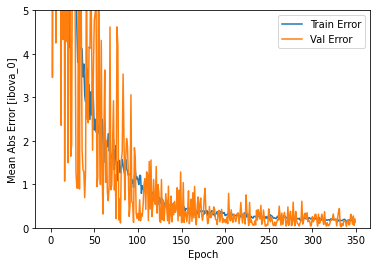

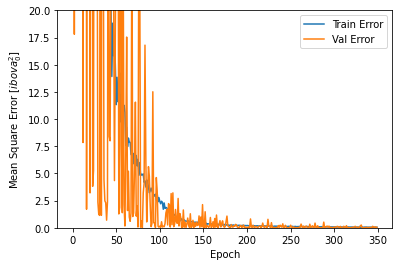

In [15]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [ibova_0]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$ibova_0^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


....................

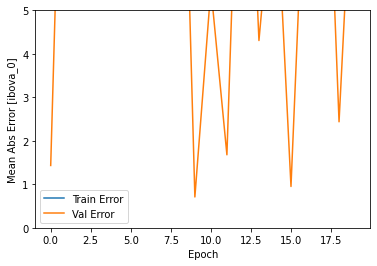

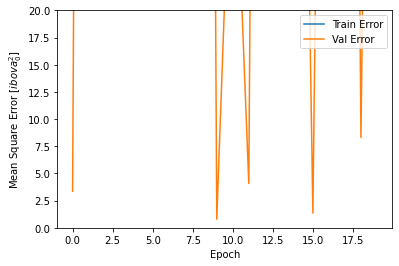

In [16]:
model = build_model()

# O parâmetro patience é o quantidade de epochs para checar as melhoras
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [17]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} ibova_0".format(mae))

15/15 - 0s - loss: 141.8159 - mae: 10.4393 - mse: 141.8159
Testing set Mean Abs Error: 10.44 ibova_0


# Realizando as previsões

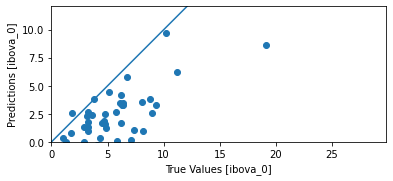

In [18]:
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [ibova_0]')
plt.ylabel('Predictions [ibova_0]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

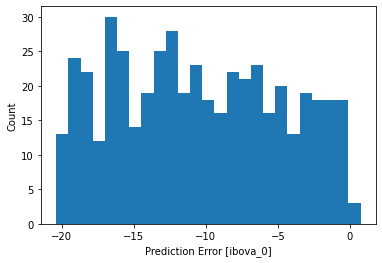

In [19]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [ibova_0]")
_ = plt.ylabel("Count")

In [20]:
raw_dataset

,index,ibova_0,ibova_1,ibova_2,ibova_3,ibova_4,oil_0,oil_1,oil_2,oil_3,oil_4,usd_0,usd_1,usd_2,usd_3,usd_4
0,0,1.852453,5.731218,5.678287,6.704554,4.870696,1.852453,5.731218,5.678287,6.704554,4.870696,1.852453,5.731218,5.678287,6.704554,4.870696
1,1,5.731218,5.678287,6.704554,4.870696,5.135128,5.731218,5.678287,6.704554,4.870696,5.135128,5.731218,5.678287,6.704554,4.870696,5.135128
2,2,5.678287,6.704554,4.870696,5.135128,5.976096,5.678287,6.704554,4.870696,5.135128,5.976096,5.678287,6.704554,4.870696,5.135128,5.976096
3,3,6.704554,4.870696,5.135128,5.976096,10.159998,6.704554,4.870696,5.135128,5.976096,10.159998,6.704554,4.870696,5.135128,5.976096,10.159998
4,4,4.870696,5.135128,5.976096,10.159998,8.056570,4.870696,5.135128,5.976096,10.159998,8.056570,4.870696,5.135128,5.976096,10.159998,8.056570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,2388,-1.279721,-3.354260,-6.276465,-6.729609,-7.903147,-1.279721,-3.354260,-6.276465,-6.729609,-7.903147,-1.279721,-3.354260,-6.276465,-6.729609,-7.903147
2389,2389,-3.354260,-6.276465,-6.729609,-7.903147,-6.691182,-3.354260,-6.276465,-6.729609,-7.903147,-6.691182,-3.354260,-6.276465,-6.729609,-7.903147,-6.691182
2390,2390,-6.276465,-6.729609,-7.903147,-6.691182,-7.227916,-6.276465,-6.729609,-7.903147,-6.691182,-7.227916,-6.276465,-6.729609,-7.903147,-6.691182,-7.227916
2391,2391,-6.729609,-7.903147,-6.691182,-7.227916,-6.595764,-6.729609,-7.903147,-6.691182,-7.227916,-6.595764,-6.729609,-7.903147,-6.691182,-7.227916,-6.595764
